In [1]:
# sort out order to work out code dict again, then try concat the dfs
#    df.rename(columns = code_dict, inplace = True)
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cleaned_df = pd.read_csv('data/cleaned_df.csv')

In [24]:
pd.set_option("display.max_rows", 50, "display.max_columns", 50)

In [333]:
countries = ['australia', 'canada', 'denmark', 'france', 'germany', 'italy', 'norway', 'spain', 'united-kingdom', 'united-states']

# Codebook

In [4]:
df_q = pd.read_excel('codebook.xlsx')

In [34]:
df_q.loc[0:50]

,RecordNo,Unnamed: 1,Unnamed: 2
0,NaN,NaN,Value
1,Standard Attributes,Label,RecordNo
2,NaN,Type,Numeric
3,NaN,Measurement,Nominal
4,NaN,NaN,NaN
...,...,...,...
46,NaN,31,week 31
47,NaN,32,week 32
48,NaN,33,week 33
49,NaN,34,week 34


In [4]:
#df_q.drop(df_q.index[:67], inplace=True)

In [5]:
df_q.dropna(axis=0, subset=['RecordNo'], inplace=True) 

In [6]:
df_q.reset_index(drop=True, inplace=True)

In [7]:
for index, row in df_q.iterrows():
    if pd.isna(row['Unnamed: 2']) == True:
        df_q.iloc[index]['Unnamed: 2'] = df_q.iloc[index+1]['Unnamed: 2']

In [8]:
df_q=df_q[df_q['RecordNo'] != 'Standard Attributes']

In [9]:
df_q=df_q[df_q['RecordNo'] != 'Valid Values']

In [10]:
df_q.drop('Unnamed: 1', axis=1, inplace=True)

In [11]:
df_q.reset_index(drop=True, inplace=True)

In [12]:
df_q.rename(columns = {'RecordNo':'code', 'Unnamed: 2': 'question'}, inplace = True)
df_q

,code,question
0,endtime,When did you complete this qx (epoch seconds)?
1,qweek,"THIS IS SHOWN ONLY IN TEST MODE, PLEASE UPDATE..."
2,i1_health,About how many people from your household have...
3,i2_health,"Not including those people in your household, ..."
4,i7a_health,How many times did you leave your home yesterd...
...,...,...
507,Multiple Response Categories,I'm not eligible to receive one yet
508,$child_age,"In which, if any, any of the following age gro..."
509,Multiple Response Categories,0 - 2
510,$WAH7,If you are likely to further away from the cen...


In [13]:
code_dict={}
for index, row in df_q.iterrows():
    code = row['code']
    q = row['question']
    code_dict[code]=q
code_dict

{'endtime': 'When did you complete this qx (epoch seconds)?',
 'qweek': 'THIS IS SHOWN ONLY IN TEST MODE, PLEASE UPDATE THIS VARIABLE BEFORE LAUNCH',
 'i1_health': 'About how many people from your household have you come into physical contact with (within 2 meters / 6 feet)?',
 'i2_health': 'Not including those people in your household, about how many people have you come into physical contact with (within 2 meters / 6 feet)?',
 'i7a_health': 'How many times did you leave your home yesterday?  If you are not staying at home, how many times did you leave where you are staying yesterday?',
 'i3_health': 'In the last 7 days, have you personally been tested for coronavirus (COVID-19?)',
 'i4_health': 'In the last 7 days, has someone in your household been tested for coronavirus (COVID-19)?',
 'i5_health_1': 'Dry cough',
 'i5_health_2': 'Fever',
 'i5_health_3': 'Loss of sense of smell',
 'i5_health_4': 'Loss of sense of taste',
 'i5_health_5': 'Shortness of breath or difficulty breathing',


# Open and work out nans

In [19]:
emp_dict={
'employment_status_1': 'Full time employment',
'employment_status_2': 'Part time employment',
'employment_status_3': 'Full time student',
'employment_status_4': 'Retired',
'employment_status_5': 'Unemployed',
'employment_status_6': 'Not working',
'employment_status_7': 'Other'
}


In [20]:
def emp_helper(df):
    for index, row in df.iterrows():
        for k in emp_dict:
            if row[k] == 'Yes':
                df.loc[index, 'employment_status'] = emp_dict[k]
    drop_list=list(emp_dict.keys())
    df.drop(drop_list, axis=1, inplace=True)
    return df

In [83]:
def make_df_dict(code_list=False, dropna_cols=False):
    dataframe_country_dict = {}
    for country in countries:
        file_name=f'data/{country}.csv'
        print(country)
        df = pd.read_csv(file_name, low_memory=False, na_values=' ')
        if country == 'denmark' or country == 'norway':
            df["employment_status"] = ""
            df = emp_helper(df)
        if code_list:
            df=df[code_list]
        if dropna_cols:
            df = df.dropna(subset=dropna_cols)
        df['Country'] = country
        dataframe_country_dict[country] = df
    conc_df = pd.concat(dataframe_country_dict.values())
    return conc_df

In [334]:
conc_df = make_df_dict()

australia
canada
denmark
france
germany
italy
norway
spain
united-kingdom
united-states


In [58]:
def nan_col_sorted(df):
    col_nans={}
    for col in df.columns:
        no_nans=df[col].isnull().sum()
        try:
            written_code=f'{col}~{code_dict[col]}'
        except:
            written_code='RecordNo'
        col_nans[written_code] = no_nans
    sortlist = sorted(col_nans.items(), key=lambda x:x[1])
    sortdict = dict(sortlist)
    return sortdict

In [335]:
nan_col_sorted(conc_df)

{'endtime~When did you complete this qx (epoch seconds)?': 0,
 'qweek~THIS IS SHOWN ONLY IN TEST MODE, PLEASE UPDATE THIS VARIABLE BEFORE LAUNCH': 0,
 'weight~Weight': 0,
 'age~What is your age?': 0,
 'gender~Gender': 0,
 'i14_health_other~i14healthother': 18,
 'i12_health_3~Used hand sanitiser': 49,
 'i12_health_14~Avoided large-sized social gatherings (more than 10 people)': 53,
 'i12_health_13~Avoided medium-sized social gatherings (between 3 and 10 people)': 54,
 'i2_health~Not including those people in your household, about how many people have you come into physical contact with (within 2 meters / 6 feet)?': 59,
 'i12_health_1~Worn a face mask outside your home (e.g. when on public transport, going to a supermarket, going to a main road)': 59,
 'i12_health_15~Avoided crowded areas': 60,
 'i12_health_16~Avoided going to shops': 60,
 'i12_health_6~Avoided going out in general': 61,
 'i12_health_12~Avoided small social gatherings (not more than 2 people)': 62,
 'i12_health_4~Covered

In [336]:
key_df = conc_df.copy()
key_df = key_df.dropna(subset=['PHQ4_2', 'vac2_2', 'vac', 'employment_status', 'd1_health_3'])
key_df_nan_dict = nan_col_sorted(key_df)
key_df_nan_dict

{'endtime~When did you complete this qx (epoch seconds)?': 0,
 'qweek~THIS IS SHOWN ONLY IN TEST MODE, PLEASE UPDATE THIS VARIABLE BEFORE LAUNCH': 0,
 'i2_health~Not including those people in your household, about how many people have you come into physical contact with (within 2 meters / 6 feet)?': 0,
 'i9_health~Thinking about the next 7 days… would you isolate yourself after feeling unwell or having any of the following new symptoms: a dry cough, fever, loss of sense of smell, loss of sense of taste, shortness of breath or difficulty breathing?': 0,
 'i11_health~If you were advised to do so by a healthcare professional or public health authority to what extent are you willing or not to self-isolate for 7 days?': 0,
 'i12_health_1~Worn a face mask outside your home (e.g. when on public transport, going to a supermarket, going to a main road)': 0,
 'i12_health_2~Washed hands with soap and water': 0,
 'i12_health_3~Used hand sanitiser': 0,
 'i12_health_4~Covered your nose and mouth whe

In [337]:
codes_no_nans = {k:v for k, v in key_df_nan_dict.items() if v<100}

In [338]:
codes_no_nans

{'endtime~When did you complete this qx (epoch seconds)?': 0,
 'qweek~THIS IS SHOWN ONLY IN TEST MODE, PLEASE UPDATE THIS VARIABLE BEFORE LAUNCH': 0,
 'i2_health~Not including those people in your household, about how many people have you come into physical contact with (within 2 meters / 6 feet)?': 0,
 'i9_health~Thinking about the next 7 days… would you isolate yourself after feeling unwell or having any of the following new symptoms: a dry cough, fever, loss of sense of smell, loss of sense of taste, shortness of breath or difficulty breathing?': 0,
 'i11_health~If you were advised to do so by a healthcare professional or public health authority to what extent are you willing or not to self-isolate for 7 days?': 0,
 'i12_health_1~Worn a face mask outside your home (e.g. when on public transport, going to a supermarket, going to a main road)': 0,
 'i12_health_2~Washed hands with soap and water': 0,
 'i12_health_3~Used hand sanitiser': 0,
 'i12_health_4~Covered your nose and mouth whe

In [75]:
final_code_dict = {'i2_health~Not including those people in your household, about how many people have you come into physical contact with (within 2 meters / 6 feet)?': 0,
 'i11_health~If you were advised to do so by a healthcare professional or public health authority to what extent are you willing or not to self-isolate for 7 days?': 0,
 'i12_health_1~Worn a face mask outside your home (e.g. when on public transport, going to a supermarket, going to a main road)': 0,
 'i12_health_2~Washed hands with soap and water': 0,
 'i12_health_3~Used hand sanitiser': 0,
 'i12_health_4~Covered your nose and mouth when sneezing or coughing': 0,
 'i12_health_5~Avoided contact with people who have symptoms or you think may have been exposed to the coronavirus': 0,
 'i12_health_6~Avoided going out in general': 0,
 'i12_health_7~Avoided going to hospital or other healthcare settings': 0,
 'i12_health_8~Avoided taking public transport': 0,
 'i12_health_11~Avoided having guests to your home': 0,
 'i12_health_12~Avoided small social gatherings (not more than 2 people)': 0,
 'i12_health_14~Avoided large-sized social gatherings (more than 10 people)': 0,
 'd1_health_1~Arthritis': 0,
 'd1_health_2~Asthma': 0,
 'd1_health_3~Cancer': 0,
 'd1_health_4~Cystic fibrosis': 0,
 'd1_health_5~Chronic obstructive pulmonary disease (COPD)': 0,
 'd1_health_6~Diabetes': 0,
 'd1_health_7~Epilepsy': 0,
 'd1_health_8~Heart disease': 0,
 'd1_health_9~High blood pressure': 0,
 'd1_health_10~High cholesterol': 0,
 'd1_health_11~HIV/ Aids': 0,
 'd1_health_13~Multiple Sclerosis': 0,
 'weight~Weight': 0,
 'age~What is your age?': 0,
 'gender~Gender': 0,
 'household_size~Number of people in household': 0,
 'employment_status~Employment Status': 0,
 'WCRex2~And how much confidence do you have in the NHS to respond to a Coronavirus (COVID-19) outbreak in the UK?': 0,
 'PHQ4_2~Feeling down, depressed, or hopeless': 0,
 'WCRex1~How well or badly do you think the Government are handling the issue of the Coronavirus (COVID-19)?': 0,
 'r1_1~Coronavirus (COVID-19) is very dangerous for me': 0,
 'r1_2~It is likely that I will get coronavirus (COVID-19) in the future': 0,
 'r1_6~I feel it is important to carry out activities which will improve my health': 0,
 'r1_7~My life has been greatly affected by coronavirus (COVID-19)': 0,
 'vac2_1~I am worried about getting COVID19': 0,
 'vac2_2~I am worried about potential side effects of a COVID19 vaccine': 0,
 'vac2_3~I believe government health authorities in my country will provide me with an effective COVID19 vaccine': 0,
 'vac7~How much do you trust COVID-19 vaccines?': 0,
 'r1_8~Getting a vaccine will protect me against coronavirus (COVID-19)': 0,
 'r1_9~Getting a vaccine will protect others against coronavirus (COVID-19)': 0,
 'vac2_7~A vaccine for coronavirus (COVID-19) will protect me against any variants, strains or mutations of coronavirus': 0,
 'vac~Have you had the first or second doses of a Coronavirus (COVID-19) vaccine?': 0}

In [106]:
final_code_list = ['qweek']
for k in final_code_dict:
    split_list = k.split('~')
    final_code_list.append(split_list[0])
final_code_list    

['qweek',
 'i2_health',
 'i11_health',
 'i12_health_1',
 'i12_health_2',
 'i12_health_3',
 'i12_health_4',
 'i12_health_5',
 'i12_health_6',
 'i12_health_7',
 'i12_health_8',
 'i12_health_11',
 'i12_health_12',
 'i12_health_14',
 'd1_health_1',
 'd1_health_2',
 'd1_health_3',
 'd1_health_4',
 'd1_health_5',
 'd1_health_6',
 'd1_health_7',
 'd1_health_8',
 'd1_health_9',
 'd1_health_10',
 'd1_health_11',
 'd1_health_13',
 'weight',
 'age',
 'gender',
 'household_size',
 'employment_status',
 'WCRex2',
 'PHQ4_2',
 'WCRex1',
 'r1_1',
 'r1_2',
 'r1_6',
 'r1_7',
 'vac2_1',
 'vac2_2',
 'vac2_3',
 'vac7',
 'r1_8',
 'r1_9',
 'vac2_7',
 'vac']

In [341]:
na_cols = ['PHQ4_2', 'vac2_2', 'vac', 'employment_status', 'd1_health_3']
no_nan_df = make_df_dict(code_list=final_code_list, dropna_cols=na_cols)

australia
canada
denmark
france
germany
italy
norway
spain
united-kingdom
united-states


In [342]:
no_nan_df.reset_index(drop=True, inplace=True)

# Apply 

## qweek

In [344]:
no_nan_df['qweek'] = no_nan_df['qweek'].apply(lambda x: x[5:])

## households

In [345]:
hh_dict={1.0: 1, 2.0:2, 3.0:3, 4.0:4, 5.0:5, 6.0:6, 7.0:7, 8.0:8,
         '1':1,'2':2, '3':3, '4':4, '5':5, '6':6, '7':7.0, '8 or more':8.0,
         'Prefer not to say': np.nan, "Don't know": np.nan,}

no_nan_df = mapper('household_size', hh_dict, no_nan_df)

In [346]:
no_nan_df['household_size'] = no_nan_df['household_size'].fillna(2.5)
c=1
for index, row in no_nan_df.iterrows():
    if row['household_size'] ==2.5:
        if c % 2 == 0:
            fill_no= 2
        else:
            fill_no=3
        no_nan_df.loc[index, 'household_size'] = fill_no
        c+=1

## Vax trust/gen attitudes

In [347]:
vt_list=['vac2_1','vac2_2','vac2_3','vac2_7', 'r1_1', 'r1_2', 'r1_6', 'r1_7', 'r1_8', 'r1_9']
for vt in vt_list:
    no_nan_df[vt] = no_nan_df[vt].apply(lambda x: x[:1]).astype('int64')

# Map

In [313]:
def mapper(code, dic, df):
    df[code] = df[code].map(dic)
    return df

In [314]:
always_never_dic = {'Always':0, 'Frequently':1, 'Sometimes': 2, 'Rarely': 3, 'Not at all': 4}
yes_no_dic =  {'No':0, 'Yes':1}
willing_dic = {'Very willing':0, 'Somewhat willing':1, 'Neither willing nor unwilling': 2, 'Somewhat unwilling': 3, 'Very unwilling': 4, 'Not sure': 5}
no_days_mental_dic ={'Not at all':0, 'Several days':1, 'More than half the days':2, 
                 'Nearly every day':3, 'Prefer not to say':4}

## gender

In [348]:
g_dic = {'Male':0, 'Female':1}
mapper('gender', g_dic, no_nan_df)

,qweek,i2_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_11,i12_health_12,i12_health_14,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_13,weight,age,gender,household_size,employment_status,WCRex2,PHQ4_2,WCRex1,r1_1,r1_2,r1_6,r1_7,vac2_1,vac2_2,vac2_3,vac7,r1_8,r1_9,vac2_7,vac,Country
0,26,5.0,Very willing,Not at all,Sometimes,Sometimes,Frequently,Not at all,Not at all,Not at all,Not at all,Not at all,Rarely,Not at all,No,No,No,No,No,No,No,No,No,No,No,No,0.733575,40,1,3.0,Part time employment,A lot of confidence,Not at all,Very well,2,1,6,3,4,5,5,Moderately,6,7,5,"No, neither",australia
1,26,2.0,Very willing,Not at all,Frequently,Frequently,Always,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,No,No,No,No,No,No,No,No,Yes,Yes,No,No,1.089673,75,0,2.0,Part time employment,A lot of confidence,Not at all,Very well,5,2,7,5,4,4,1,Very much,7,7,2,"No, neither",australia
2,26,0.0,Very willing,Frequently,Always,Always,Always,Always,Sometimes,Always,Always,Always,Always,Always,No,No,No,No,No,No,No,No,No,No,No,No,0.957361,38,1,3.0,Full time employment,A fair amount of confidence,More than half the days,Somewhat well,6,5,6,6,1,3,2,Moderately,6,6,3,"No, neither",australia
3,26,20.0,Very willing,Always,Always,Always,Always,Always,Rarely,Always,Always,Rarely,Sometimes,Always,No,No,No,No,No,No,No,No,Yes,Yes,No,No,0.808993,52,0,1.0,Full time employment,A fair amount of confidence,Not at all,Very well,5,3,6,6,3,3,1,Moderately,6,6,2,"No, neither",australia
4,26,4.0,Very willing,Not at all,Always,Always,Always,Always,Not at all,Sometimes,Sometimes,Not at all,Not at all,Always,No,No,No,No,No,No,No,No,No,No,No,No,1.126703,67,1,2.0,Part time employment,A lot of confidence,Not at all,Very well,7,4,7,1,3,4,1,Moderately,6,6,3,"No, neither",australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130866,33,0.0,Very willing,Always,Always,Always,Always,Always,Sometimes,Always,Always,Always,Always,Always,No,No,No,No,No,No,No,No,Yes,No,No,No,0.753059,65,1,2.0,Retired,A lot of confidence,Not at all,Very well,6,1,6,5,2,4,1,Very much,7,7,1,"Yes, two doses",united-states
130867,33,100.0,Somewhat willing,Frequently,Always,Frequently,Always,Always,Not at all,Always,Always,Not at all,Not at all,Frequently,No,No,No,No,No,No,No,No,No,No,No,No,2.325241,24,1,3.0,Full time employment,A lot of confidence,Not at all,Somewhat well,4,2,5,1,3,3,1,Not at all,2,5,1,"No, neither",united-states
130868,33,20.0,Very willing,Sometimes,Always,Rarely,Always,Always,Not at all,Not at all,Always,Rarely,Not at all,Frequently,No,No,No,No,No,No,No,No,No,No,No,No,1.287069,37,0,3.0,Full time employment,Not very much confidence,Several days,Don't know,4,5,7,7,2,2,3,Moderately,6,4,3,"Yes, two doses",united-states
130869,33,5.0,Very willing,Always,Always,Always,Always,Always,Sometimes,Sometimes,Always,Frequently,Always,Always,No,No,No,No,No,Yes,No,No,Yes,Yes,No,No,0.753059,71,1,2.0,Retired,A lot of confidence,Not at all,Very well,7,4,6,5,2,4,2,Very much,5,5,2,"Yes, two doses",united-states


In [316]:
def v_counts(colu):
    print(no_nan_df[colu].value_counts())
    

## self-isolate

In [349]:
mapper('i11_health', willing_dic, no_nan_df)

,qweek,i2_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_11,i12_health_12,i12_health_14,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_13,weight,age,gender,household_size,employment_status,WCRex2,PHQ4_2,WCRex1,r1_1,r1_2,r1_6,r1_7,vac2_1,vac2_2,vac2_3,vac7,r1_8,r1_9,vac2_7,vac,Country
0,26,5.0,0,Not at all,Sometimes,Sometimes,Frequently,Not at all,Not at all,Not at all,Not at all,Not at all,Rarely,Not at all,No,No,No,No,No,No,No,No,No,No,No,No,0.733575,40,1,3.0,Part time employment,A lot of confidence,Not at all,Very well,2,1,6,3,4,5,5,Moderately,6,7,5,"No, neither",australia
1,26,2.0,0,Not at all,Frequently,Frequently,Always,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,No,No,No,No,No,No,No,No,Yes,Yes,No,No,1.089673,75,0,2.0,Part time employment,A lot of confidence,Not at all,Very well,5,2,7,5,4,4,1,Very much,7,7,2,"No, neither",australia
2,26,0.0,0,Frequently,Always,Always,Always,Always,Sometimes,Always,Always,Always,Always,Always,No,No,No,No,No,No,No,No,No,No,No,No,0.957361,38,1,3.0,Full time employment,A fair amount of confidence,More than half the days,Somewhat well,6,5,6,6,1,3,2,Moderately,6,6,3,"No, neither",australia
3,26,20.0,0,Always,Always,Always,Always,Always,Rarely,Always,Always,Rarely,Sometimes,Always,No,No,No,No,No,No,No,No,Yes,Yes,No,No,0.808993,52,0,1.0,Full time employment,A fair amount of confidence,Not at all,Very well,5,3,6,6,3,3,1,Moderately,6,6,2,"No, neither",australia
4,26,4.0,0,Not at all,Always,Always,Always,Always,Not at all,Sometimes,Sometimes,Not at all,Not at all,Always,No,No,No,No,No,No,No,No,No,No,No,No,1.126703,67,1,2.0,Part time employment,A lot of confidence,Not at all,Very well,7,4,7,1,3,4,1,Moderately,6,6,3,"No, neither",australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130866,33,0.0,0,Always,Always,Always,Always,Always,Sometimes,Always,Always,Always,Always,Always,No,No,No,No,No,No,No,No,Yes,No,No,No,0.753059,65,1,2.0,Retired,A lot of confidence,Not at all,Very well,6,1,6,5,2,4,1,Very much,7,7,1,"Yes, two doses",united-states
130867,33,100.0,1,Frequently,Always,Frequently,Always,Always,Not at all,Always,Always,Not at all,Not at all,Frequently,No,No,No,No,No,No,No,No,No,No,No,No,2.325241,24,1,3.0,Full time employment,A lot of confidence,Not at all,Somewhat well,4,2,5,1,3,3,1,Not at all,2,5,1,"No, neither",united-states
130868,33,20.0,0,Sometimes,Always,Rarely,Always,Always,Not at all,Not at all,Always,Rarely,Not at all,Frequently,No,No,No,No,No,No,No,No,No,No,No,No,1.287069,37,0,3.0,Full time employment,Not very much confidence,Several days,Don't know,4,5,7,7,2,2,3,Moderately,6,4,3,"Yes, two doses",united-states
130869,33,5.0,0,Always,Always,Always,Always,Always,Sometimes,Sometimes,Always,Frequently,Always,Always,No,No,No,No,No,Yes,No,No,Yes,Yes,No,No,0.753059,71,1,2.0,Retired,A lot of confidence,Not at all,Very well,7,4,6,5,2,4,2,Very much,5,5,2,"Yes, two doses",united-states


## precautions

In [350]:
precaution_list=['i12_health_1', 'i12_health_2', 'i12_health_3', 'i12_health_4', 'i12_health_5', 
                 'i12_health_6', 'i12_health_7', 'i12_health_8', 'i12_health_11', 'i12_health_12', 
                 'i12_health_14']

for p_code in precaution_list:
    mapper(p_code, always_never_dic, no_nan_df)

## other illness

In [351]:
other_illness_list = ['d1_health_1', 'd1_health_2', 'd1_health_3', 'd1_health_4', 'd1_health_5', 
                      'd1_health_6', 'd1_health_7', 'd1_health_8', 'd1_health_9', 'd1_health_10', 
                      'd1_health_11', 'd1_health_13'] 

for i_code in other_illness_list:
    mapper(i_code, yes_no_dic, no_nan_df)

##  govt handling

In [352]:
gov_dic = {'Very well':0, 'Somewhat well':1, 'Somewhat badly':2, 'Very badly':3, "Don't know":4}

mapper('WCRex1', gov_dic, no_nan_df)

,qweek,i2_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_11,i12_health_12,i12_health_14,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_13,weight,age,gender,household_size,employment_status,WCRex2,PHQ4_2,WCRex1,r1_1,r1_2,r1_6,r1_7,vac2_1,vac2_2,vac2_3,vac7,r1_8,r1_9,vac2_7,vac,Country
0,26,5.0,0,4,2,2,1,4,4,4,4,4,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0.733575,40,1,3.0,Part time employment,A lot of confidence,Not at all,0,2,1,6,3,4,5,5,Moderately,6,7,5,"No, neither",australia
1,26,2.0,0,4,1,1,0,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,1,1,0,0,1.089673,75,0,2.0,Part time employment,A lot of confidence,Not at all,0,5,2,7,5,4,4,1,Very much,7,7,2,"No, neither",australia
2,26,0.0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.957361,38,1,3.0,Full time employment,A fair amount of confidence,More than half the days,1,6,5,6,6,1,3,2,Moderately,6,6,3,"No, neither",australia
3,26,20.0,0,0,0,0,0,0,3,0,0,3,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0.808993,52,0,1.0,Full time employment,A fair amount of confidence,Not at all,0,5,3,6,6,3,3,1,Moderately,6,6,2,"No, neither",australia
4,26,4.0,0,4,0,0,0,0,4,2,2,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1.126703,67,1,2.0,Part time employment,A lot of confidence,Not at all,0,7,4,7,1,3,4,1,Moderately,6,6,3,"No, neither",australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130866,33,0.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.753059,65,1,2.0,Retired,A lot of confidence,Not at all,0,6,1,6,5,2,4,1,Very much,7,7,1,"Yes, two doses",united-states
130867,33,100.0,1,1,0,1,0,0,4,0,0,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,2.325241,24,1,3.0,Full time employment,A lot of confidence,Not at all,1,4,2,5,1,3,3,1,Not at all,2,5,1,"No, neither",united-states
130868,33,20.0,0,2,0,3,0,0,4,4,0,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1.287069,37,0,3.0,Full time employment,Not very much confidence,Several days,4,4,5,7,7,2,2,3,Moderately,6,4,3,"Yes, two doses",united-states
130869,33,5.0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0.753059,71,1,2.0,Retired,A lot of confidence,Not at all,0,7,4,6,5,2,4,2,Very much,5,5,2,"Yes, two doses",united-states


## health service trust

In [353]:
health_service_dic = {'A lot of confidence': 0, 'A fair amount of confidence': 1, 'Not very much confidence': 2, 'No confidence at all': 3, "Don't know": 4}

mapper('WCRex2', health_service_dic, no_nan_df)

,qweek,i2_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_11,i12_health_12,i12_health_14,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_13,weight,age,gender,household_size,employment_status,WCRex2,PHQ4_2,WCRex1,r1_1,r1_2,r1_6,r1_7,vac2_1,vac2_2,vac2_3,vac7,r1_8,r1_9,vac2_7,vac,Country
0,26,5.0,0,4,2,2,1,4,4,4,4,4,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0.733575,40,1,3.0,Part time employment,0,Not at all,0,2,1,6,3,4,5,5,Moderately,6,7,5,"No, neither",australia
1,26,2.0,0,4,1,1,0,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,1,1,0,0,1.089673,75,0,2.0,Part time employment,0,Not at all,0,5,2,7,5,4,4,1,Very much,7,7,2,"No, neither",australia
2,26,0.0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.957361,38,1,3.0,Full time employment,1,More than half the days,1,6,5,6,6,1,3,2,Moderately,6,6,3,"No, neither",australia
3,26,20.0,0,0,0,0,0,0,3,0,0,3,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0.808993,52,0,1.0,Full time employment,1,Not at all,0,5,3,6,6,3,3,1,Moderately,6,6,2,"No, neither",australia
4,26,4.0,0,4,0,0,0,0,4,2,2,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1.126703,67,1,2.0,Part time employment,0,Not at all,0,7,4,7,1,3,4,1,Moderately,6,6,3,"No, neither",australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130866,33,0.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.753059,65,1,2.0,Retired,0,Not at all,0,6,1,6,5,2,4,1,Very much,7,7,1,"Yes, two doses",united-states
130867,33,100.0,1,1,0,1,0,0,4,0,0,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,2.325241,24,1,3.0,Full time employment,0,Not at all,1,4,2,5,1,3,3,1,Not at all,2,5,1,"No, neither",united-states
130868,33,20.0,0,2,0,3,0,0,4,4,0,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1.287069,37,0,3.0,Full time employment,2,Several days,4,4,5,7,7,2,2,3,Moderately,6,4,3,"Yes, two doses",united-states
130869,33,5.0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0.753059,71,1,2.0,Retired,0,Not at all,0,7,4,6,5,2,4,2,Very much,5,5,2,"Yes, two doses",united-states


## Vax status

In [354]:
vax_stat_dic= {'No, neither':0, 'Yes, one dose':1, 'Yes, two doses':2}
mapper('vac', vax_stat_dic, no_nan_df)

,qweek,i2_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_11,i12_health_12,i12_health_14,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_13,weight,age,gender,household_size,employment_status,WCRex2,PHQ4_2,WCRex1,r1_1,r1_2,r1_6,r1_7,vac2_1,vac2_2,vac2_3,vac7,r1_8,r1_9,vac2_7,vac,Country
0,26,5.0,0,4,2,2,1,4,4,4,4,4,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0.733575,40,1,3.0,Part time employment,0,Not at all,0,2,1,6,3,4,5,5,Moderately,6,7,5,0,australia
1,26,2.0,0,4,1,1,0,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,1,1,0,0,1.089673,75,0,2.0,Part time employment,0,Not at all,0,5,2,7,5,4,4,1,Very much,7,7,2,0,australia
2,26,0.0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.957361,38,1,3.0,Full time employment,1,More than half the days,1,6,5,6,6,1,3,2,Moderately,6,6,3,0,australia
3,26,20.0,0,0,0,0,0,0,3,0,0,3,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0.808993,52,0,1.0,Full time employment,1,Not at all,0,5,3,6,6,3,3,1,Moderately,6,6,2,0,australia
4,26,4.0,0,4,0,0,0,0,4,2,2,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1.126703,67,1,2.0,Part time employment,0,Not at all,0,7,4,7,1,3,4,1,Moderately,6,6,3,0,australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130866,33,0.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.753059,65,1,2.0,Retired,0,Not at all,0,6,1,6,5,2,4,1,Very much,7,7,1,2,united-states
130867,33,100.0,1,1,0,1,0,0,4,0,0,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,2.325241,24,1,3.0,Full time employment,0,Not at all,1,4,2,5,1,3,3,1,Not at all,2,5,1,0,united-states
130868,33,20.0,0,2,0,3,0,0,4,4,0,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1.287069,37,0,3.0,Full time employment,2,Several days,4,4,5,7,7,2,2,3,Moderately,6,4,3,2,united-states
130869,33,5.0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0.753059,71,1,2.0,Retired,0,Not at all,0,7,4,6,5,2,4,2,Very much,5,5,2,2,united-states


## Vax trust

In [355]:
vax_trust_dic = {'Not at all':0, 'A little':1, 'Moderately':2, 'Very much':3}
mapper('vac7', vax_trust_dic, no_nan_df)

,qweek,i2_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_11,i12_health_12,i12_health_14,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_13,weight,age,gender,household_size,employment_status,WCRex2,PHQ4_2,WCRex1,r1_1,r1_2,r1_6,r1_7,vac2_1,vac2_2,vac2_3,vac7,r1_8,r1_9,vac2_7,vac,Country
0,26,5.0,0,4,2,2,1,4,4,4,4,4,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0.733575,40,1,3.0,Part time employment,0,Not at all,0,2,1,6,3,4,5,5,2,6,7,5,0,australia
1,26,2.0,0,4,1,1,0,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,1,1,0,0,1.089673,75,0,2.0,Part time employment,0,Not at all,0,5,2,7,5,4,4,1,3,7,7,2,0,australia
2,26,0.0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.957361,38,1,3.0,Full time employment,1,More than half the days,1,6,5,6,6,1,3,2,2,6,6,3,0,australia
3,26,20.0,0,0,0,0,0,0,3,0,0,3,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0.808993,52,0,1.0,Full time employment,1,Not at all,0,5,3,6,6,3,3,1,2,6,6,2,0,australia
4,26,4.0,0,4,0,0,0,0,4,2,2,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1.126703,67,1,2.0,Part time employment,0,Not at all,0,7,4,7,1,3,4,1,2,6,6,3,0,australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130866,33,0.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.753059,65,1,2.0,Retired,0,Not at all,0,6,1,6,5,2,4,1,3,7,7,1,2,united-states
130867,33,100.0,1,1,0,1,0,0,4,0,0,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,2.325241,24,1,3.0,Full time employment,0,Not at all,1,4,2,5,1,3,3,1,0,2,5,1,0,united-states
130868,33,20.0,0,2,0,3,0,0,4,4,0,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1.287069,37,0,3.0,Full time employment,2,Several days,4,4,5,7,7,2,2,3,2,6,4,3,2,united-states
130869,33,5.0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0.753059,71,1,2.0,Retired,0,Not at all,0,7,4,6,5,2,4,2,3,5,5,2,2,united-states


## mental health

In [356]:
mapper('PHQ4_2', no_days_mental_dic, no_nan_df)

,qweek,i2_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_11,i12_health_12,i12_health_14,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_13,weight,age,gender,household_size,employment_status,WCRex2,PHQ4_2,WCRex1,r1_1,r1_2,r1_6,r1_7,vac2_1,vac2_2,vac2_3,vac7,r1_8,r1_9,vac2_7,vac,Country
0,26,5.0,0,4,2,2,1,4,4,4,4,4,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0.733575,40,1,3.0,Part time employment,0,0,0,2,1,6,3,4,5,5,2,6,7,5,0,australia
1,26,2.0,0,4,1,1,0,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,1,1,0,0,1.089673,75,0,2.0,Part time employment,0,0,0,5,2,7,5,4,4,1,3,7,7,2,0,australia
2,26,0.0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.957361,38,1,3.0,Full time employment,1,2,1,6,5,6,6,1,3,2,2,6,6,3,0,australia
3,26,20.0,0,0,0,0,0,0,3,0,0,3,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0.808993,52,0,1.0,Full time employment,1,0,0,5,3,6,6,3,3,1,2,6,6,2,0,australia
4,26,4.0,0,4,0,0,0,0,4,2,2,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1.126703,67,1,2.0,Part time employment,0,0,0,7,4,7,1,3,4,1,2,6,6,3,0,australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130866,33,0.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.753059,65,1,2.0,Retired,0,0,0,6,1,6,5,2,4,1,3,7,7,1,2,united-states
130867,33,100.0,1,1,0,1,0,0,4,0,0,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,2.325241,24,1,3.0,Full time employment,0,0,1,4,2,5,1,3,3,1,0,2,5,1,0,united-states
130868,33,20.0,0,2,0,3,0,0,4,4,0,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1.287069,37,0,3.0,Full time employment,2,1,4,4,5,7,7,2,2,3,2,6,4,3,2,united-states
130869,33,5.0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0.753059,71,1,2.0,Retired,0,0,0,7,4,6,5,2,4,2,3,5,5,2,2,united-states


In [357]:
v_counts('PHQ4_2')

0    60553
1    42248
2    13250
3    12066
4     2754
Name: PHQ4_2, dtype: int64


# Get_dummies

In [358]:
def OHE(code, pf, df_c):
    df = pd.concat([df_c, pd.get_dummies(df_c[code], drop_first=True, prefix=pf)], axis=1)
    df.drop(code, axis=1, inplace=True) 
    return df

## emp_status

In [359]:
emp_df = OHE('employment_status', 'emp', no_nan_df)

## Country

In [360]:
cleaned_df = OHE('Country', 'country', emp_df)

In [329]:
cleaned_df

,qweek,i2_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_11,i12_health_12,i12_health_14,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,...,r1_2,r1_6,r1_7,vac2_1,vac2_2,vac2_3,vac7,r1_8,r1_9,vac2_7,vac,emp_Full time student,emp_Not working,emp_Other,emp_Part time employment,emp_Retired,emp_Unemployed,country_canada,country_denmark,country_france,country_germany,country_italy,country_norway,country_spain,country_united-kingdom
0,26,5.0,0,4,2,2,1,4,4,4,4,4,3,4,0,0,0,0,0,0,0,0,0,0,0,...,1,6,3,4,5,5,2,6,7,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,26,2.0,0,4,1,1,0,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,1,1,0,...,2,7,5,4,4,1,3,7,7,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,26,0.0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,6,6,1,3,2,2,6,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,26,20.0,0,0,0,0,0,0,3,0,0,3,2,0,0,0,0,0,0,0,0,0,1,1,0,...,3,6,6,3,3,1,2,6,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,26,4.0,0,4,0,0,0,0,4,2,2,4,4,0,0,0,0,0,0,0,0,0,0,0,0,...,4,7,1,3,4,1,2,6,6,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122794,51,6.0,0,4,0,0,0,0,0,4,4,4,0,0,1,0,0,0,0,0,0,0,1,0,0,...,1,7,7,4,4,1,3,7,7,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1
122795,51,12.0,0,1,0,1,0,0,2,4,2,1,4,1,0,0,0,0,0,0,0,0,0,0,0,...,4,5,5,1,5,2,3,7,7,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
122796,51,2.0,0,0,0,2,0,0,3,1,3,4,4,1,0,1,0,0,0,0,0,0,0,0,0,...,2,6,7,2,2,1,3,6,7,3,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1
122797,51,1.0,0,0,0,0,0,0,1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,6,5,2,2,3,3,2,7,7,3,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1


# Get rid of not sure in target

In [361]:
cleaned_df=cleaned_df[cleaned_df['PHQ4_2']!=4]
cleaned_df['PHQ4_2'].value_counts()                   

0    60553
1    42248
2    13250
3    12066
Name: PHQ4_2, dtype: int64

In [363]:
cleaned_df.to_csv('data/cleaned_df.csv', index=False)

# Logistic

In [3]:
cleaned_df

,qweek,i2_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,...,emp_Unemployed,country_canada,country_denmark,country_france,country_germany,country_italy,country_norway,country_spain,country_united-kingdom,country_united-states
0,26,5.0,0,4,2,2,1,4,4,4,...,0,0,0,0,0,0,0,0,0,0
1,26,2.0,0,4,1,1,0,4,4,4,...,0,0,0,0,0,0,0,0,0,0
2,26,0.0,0,1,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,26,20.0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4,26,4.0,0,4,0,0,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128112,33,0.0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
128113,33,100.0,1,1,0,1,0,0,4,0,...,0,0,0,0,0,0,0,0,0,1
128114,33,20.0,0,2,0,3,0,0,4,4,...,0,0,0,0,0,0,0,0,0,1
128115,33,5.0,0,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,1


In [87]:
log_df=cleaned_df.copy()
log_df['PHQ4_2']=log_df['PHQ4_2'].replace({1:0, 3:2})
log_df['PHQ4_2']=log_df['PHQ4_2'].replace({2:1})
log_df['PHQ4_2'].value_counts()
                  

0    102801
1     25316
Name: PHQ4_2, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

# Split df into X and y
X = log_df.drop(['qweek','PHQ4_2'], axis=1)
y = log_df['PHQ4_2']

# Perform train-test split with random_state=42 and stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [72]:
X_train.shape

(96087, 58)

In [100]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

def custom_cross_val_score(estimator, X, y):
    # Create a list to hold the scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # Instantiate a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extract train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Instantiate StandardScaler
        scaler = StandardScaler()
        # Fit and transform X_t
        X_t_scaled = scaler.fit_transform(X_t)
        # Transform X_val
        X_val_scaled = scaler.transform(X_val)
        
        #sm = SMOTE(sampling_strategy = 0.28)
        #X_res, y_res = sm.fit_resample(X_t_scaled, y_t)

        # Clone the provided model and fit it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_scaled, y_t)
        
        # Evaluate the provided model on the train and validation subsets
        neg_log_loss_score_train = neg_log_loss(temp_model, X_t_scaled, y_t)
        neg_log_loss_score_val = neg_log_loss(temp_model, X_val_scaled, y_val)
        kfold_train_scores[fold] = neg_log_loss_score_train
        kfold_val_scores[fold] = neg_log_loss_score_val
        
    return kfold_train_scores, kfold_val_scores
        
model_with_preprocessing = LogisticRegression(random_state=42, C=1, class_weight='balanced')
preprocessed_train_scores, preprocessed_neg_log_loss_cv = custom_cross_val_score(model_with_preprocessing, X_train, y_train)
- (preprocessed_neg_log_loss_cv.mean())

0.6085670096140241

In [101]:
print("Train:     ", -preprocessed_train_scores)
print("Validation:", -preprocessed_neg_log_loss_cv)

Train:      [0.60805107 0.60714739 0.60681938 0.60924807 0.60780763]
Validation: [0.60779215 0.60937808 0.61092695 0.60267796 0.61205991]


In [102]:
from sklearn.metrics import accuracy_score

final_model=model_with_preprocessing 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
final_model.fit(X_train_scaled, y_train)

accuracy_score(y_test, final_model.predict(X_test_scaled))

0.665251326881049

In [103]:
from sklearn.metrics import precision_score

# Display the precision score
precision_score(y_test, final_model.predict(X_test_scaled))

0.33021566050861867

In [106]:
from sklearn.metrics import confusion_matrix


y_hat_test = final_model.predict_proba(X_test)
y_hat_test

# Print confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_hat_test)
#print('Confusion Matrix:\n', cnf_matrix)

array([[9.99597049e-01, 4.02951320e-04],
       [9.98851037e-01, 1.14896289e-03],
       [9.99936732e-01, 6.32681539e-05],
       ...,
       [1.00000000e+00, 9.61344911e-13],
       [9.99975985e-01, 2.40151618e-05],
       [1.00000000e+00, 2.33559873e-12]])

# decision tree

In [107]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [113]:
X = cleaned_df.drop(['qweek','PHQ4_2'], axis=1)
y = cleaned_df['PHQ4_2']

# Perform train-test split with random_state=42 and stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy')

In [109]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = log_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

KeyboardInterrupt: 

In [115]:
accuracy_score(y_train, clf.predict(X_train))

1.0

In [116]:
accuracy_score(y_test, clf.predict(X_test))

0.42126131751482987

In [117]:
y_hat_test = clf.predict(X_test)

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[8429 4363 1231 1116]
 [4255 3961 1211 1135]
 [1124 1188  555  446]
 [ 975 1034  459  548]]


In [150]:
three_df= cleaned_df.copy()
three_df['PHQ4_2']=three_df['PHQ4_2'].replace({3:2})
three_df['PHQ4_2']=three_df['PHQ4_2'].replace({2:1})

X = three_df.drop(['qweek','PHQ4_2'], axis=1)
y = three_df['PHQ4_2']

# Perform train-test split with random_state=42 and stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [151]:
accuracy_score(y_train, clf.predict(X_train))

1.0

In [152]:
accuracy_score(y_test, clf.predict(X_test))

0.5988136122385264

In [153]:
y_hat_test=clf.predict(X_test)

In [154]:
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[ 8777  6362]
 [ 6488 10403]]


# Random forest

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

In [156]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [157]:
tree_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00283962, 0.        , 0.09911765, 0.00389803, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.43657049, 0.00504541, 0.        , 0.01388583,
       0.        , 0.        , 0.        , 0.        , 0.36161064,
       0.        , 0.00240794, 0.00608978, 0.04338832, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00517555,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01997077, 0.        ,
       0.        , 0.        , 0.        ])

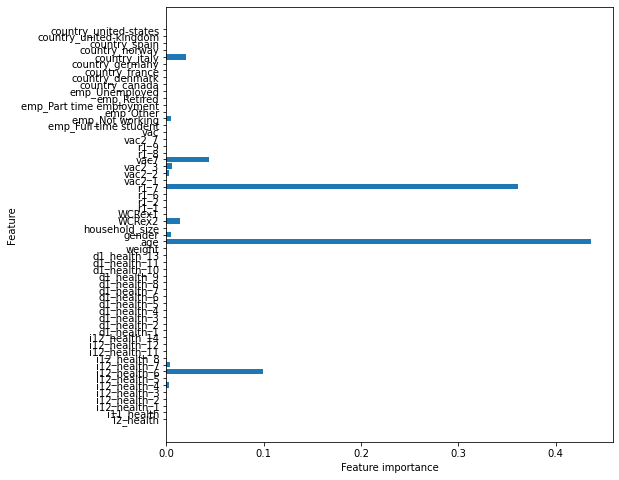

In [158]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [159]:
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 8662  6477]
 [ 4936 11955]]
              precision    recall  f1-score   support

           0       0.64      0.57      0.60     15139
           1       0.65      0.71      0.68     16891

    accuracy                           0.64     32030
   macro avg       0.64      0.64      0.64     32030
weighted avg       0.64      0.64      0.64     32030



In [160]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 64.37%


In [161]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [162]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [163]:
bagged_tree.score(X_train, y_train)

0.6519092072809017

In [164]:
bagged_tree.score(X_test, y_test)

0.6498595067124571

In [165]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [166]:
forest.score(X_train, y_train)

0.6589444982151592

In [176]:
forest.score(X_test, y_test)

0.6574461442397752

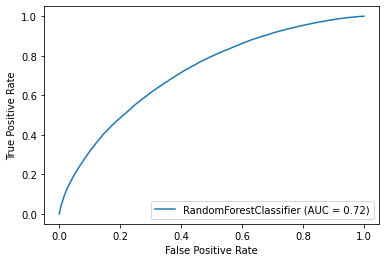

In [167]:
from sklearn.metrics import plot_roc_curve
forest.score(X_test, y_test)
plot_roc_curve(forest, X_train, y_train)

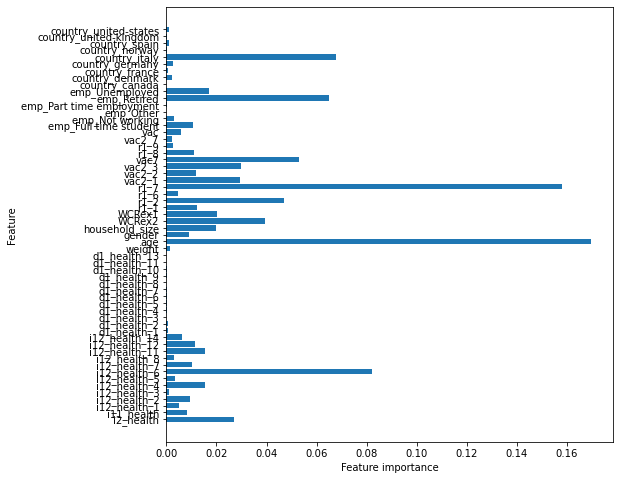

In [146]:
plot_feature_importances(forest)

In [173]:
from sklearn.metrics import roc_curve, auc
y_hat_train=forest.predict(X_train)
y_hat_test=forest.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_train, y_hat_train)

In [174]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.6505583061791431


AUC: 0.6505583061791431


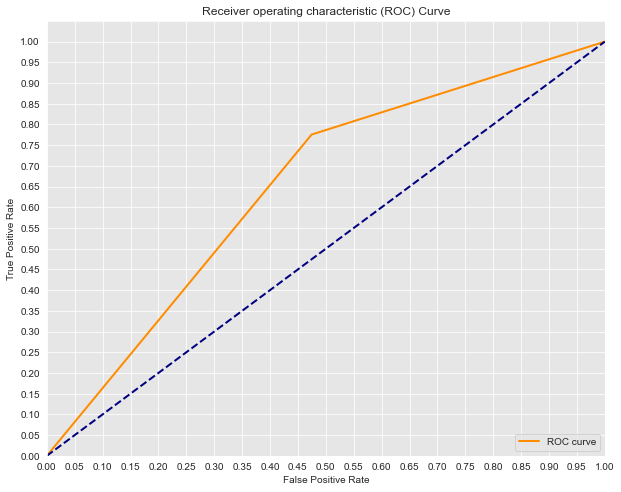

In [175]:
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# GBoost

In [179]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [180]:
xgb = XGBClassifier()

# Fit XGBClassifier
xgb.fit(X_train, y_train)

# Predict on training and test sets
training_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

C:\Users\james\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 74.76%
Validation accuracy: 68.66%


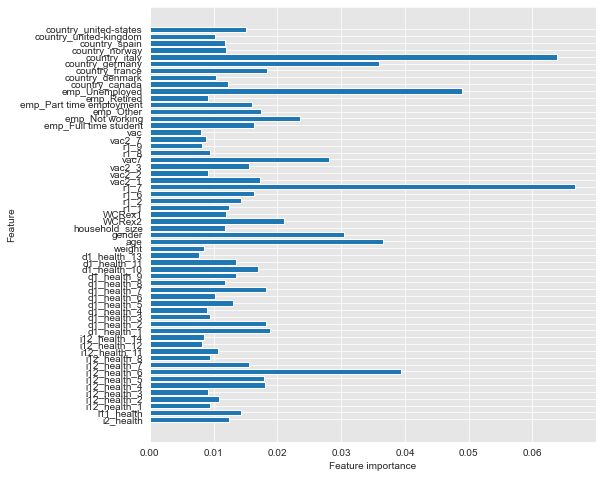

In [181]:
plot_feature_importances(xgb)

In [182]:
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

[[ 9747  5392]
 [ 4647 12244]]
              precision    recall  f1-score   support

           0       0.68      0.64      0.66     15139
           1       0.69      0.72      0.71     16891

    accuracy                           0.69     32030
   macro avg       0.69      0.68      0.68     32030
weighted avg       0.69      0.69      0.69     32030



In [183]:
three_df['PHQ4_2'].value_counts(normalize=True)

1    0.527362
0    0.472638
Name: PHQ4_2, dtype: float64

In [184]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [185]:
grid_clf = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

C:\Users\james\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:47:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[23:49:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [186]:
X = cleaned_df.drop(['qweek','PHQ4_2'], axis=1)
y = cleaned_df['PHQ4_2']

# Perform train-test split with random_state=42 and stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [187]:
xgb.fit(X_train, y_train)

# Predict on training and test sets
training_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

C:\Users\james\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:54:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:54:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 63.49%
Validation accuracy: 54.24%


In [188]:
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

[[11775  3089   118   157]
 [ 5116  4958   233   255]
 [ 1239  1612   314   148]
 [ 1016  1547   128   325]]
              precision    recall  f1-score   support

           0       0.62      0.78      0.69     15139
           1       0.44      0.47      0.46     10562
           2       0.40      0.09      0.15      3313
           3       0.37      0.11      0.17      3016

    accuracy                           0.54     32030
   macro avg       0.46      0.36      0.37     32030
weighted avg       0.51      0.54      0.51     32030



In [189]:
grid_clf = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

C:\Users\james\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:58:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:00:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[00:11:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:11:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:11:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol